Assign2: Dimensionality Reduction and High Dimensional Data
Due Date: Sep 23, before midnight (11:59:59PM)

We will the dataset Online News Popularity from the UCI Machine Learning repository. This dataset has 61 attributes and 39644 points. You will ignore the following attributes for this assignment: 0-1, 4-6, 13-38, and 60 (counting from 0). So, you'll be left with 29 attributes that you'll use. Complete the following tasks.

Part I: Principal Components (2D for CSCI4390 and 3D for CSCI6390)
You have to use power-iteration to compute the first 2 (for CSCI4390) or first 3 PCs (for CSCI6390), i.e., the eigenvectors as well as the eigenvalues. The description below is for 2 PCs, but the same procedure works for 3 PCs, by adding an additional column to the matrix of eigenvectors.

Make sure to set the seed as np.random.seed(42), so everyone will get the same results.

To compute the first two eigenvectors of the covariance matrix ΣΣ we will use a generalized power-iteration method.

Let X0X 
0
​
  be a d×2d×2 (random) matrix with two non-zero dd-dimensional column vectors with unit length (CSCI6390 will have a d×3d×3 matrix). We will iteratively multiply X0X 
0
​
  with ΣΣ on the left.

The first column will not be modified, but the second column will be orthogonalized with respect to the first one by subtracting its projection along the first column (see section 1.3.3 in chapter 1). That is, let aa and bb denote the first and second column of X1X 
1
​
 , where

X1=ΣX0
X 
1
​
 =ΣX 
0
​
 
Then we orthogonalize bb as follows:

b=b−(bTaaTa)a
b=b−( 
a 
T
 a
b 
T
 a
​
 )a
After this bb is guaranteed to be orthogonal to aa. This will yield the matrix X1X 
1
​
  with the two column vectors denoting the current estimates for the first and second eigenvectors. CSCI6390: You have to orthogonalize the third column with respect to the first two.

Before the next iteration, normalize each column to be unit length, and repeat the whole process. That is, from X1X 
1
​
  obtain X2X 
2
​
  and so on, until convergence.

To test for convergence, you can look at the difference between the XiX 
i
​
  matrix from ii-th iteration versus that from the previous iteration. Use np.linalg.norm on the difference, and if it is less than threshold ϵ=10−6ϵ=10 
−6
  then we stop.

Scatter Plot of the Data in the 2D/3D PC Basis
Once you have obtained the two eigenvectors: u1u 
1
​
  and u2u 
2
​
 , first print out both of them.

Next, project each of the original data points xix 
i
​
  onto those two vectors, to obtain the new projected points in 2D, and show the scatter plot.

Finally, output how much of the variance is captured by the first two PCs, and what is the error in the approximation if we retain only these two components.

For CSCI6390, plot the points in the first three PCs (3D scatter plot) and report the variance and error.

Part II: Points in High Dimensional Space
You will empirically verify what happens to the "center" of the space, and what happens at the "boundary".

First, reset the seed as np.random.seed(42).

Randomly generate n=1,000,000n=1,000,000 points in dd dimensions, sampled uniformly in the range [−1,1][−1,1] for each dimension, where dd will be varied from d=2d=2 to d=20d=20.

First, find and plot the fraction of points that lie in the largest inscribed hypersphere within the outer hypercube, as a function of dd. Describe the trend.

Next, given ϵ=0.1ϵ=0.1, find and plot the fraction of points that lie within the ϵϵ width hypercube along the boundary. That is, let HH denote the outer hypercube that defines the data space, and let HϵH 
ϵ
​
  be the hypercube each of whose dimensions ranges from −1+ϵ−1+ϵ to 1−ϵ1−ϵ. Plot the fraction of points in your sample that lie outside HϵH 
ϵ
​
 , as a function of dd. Describe the trend.

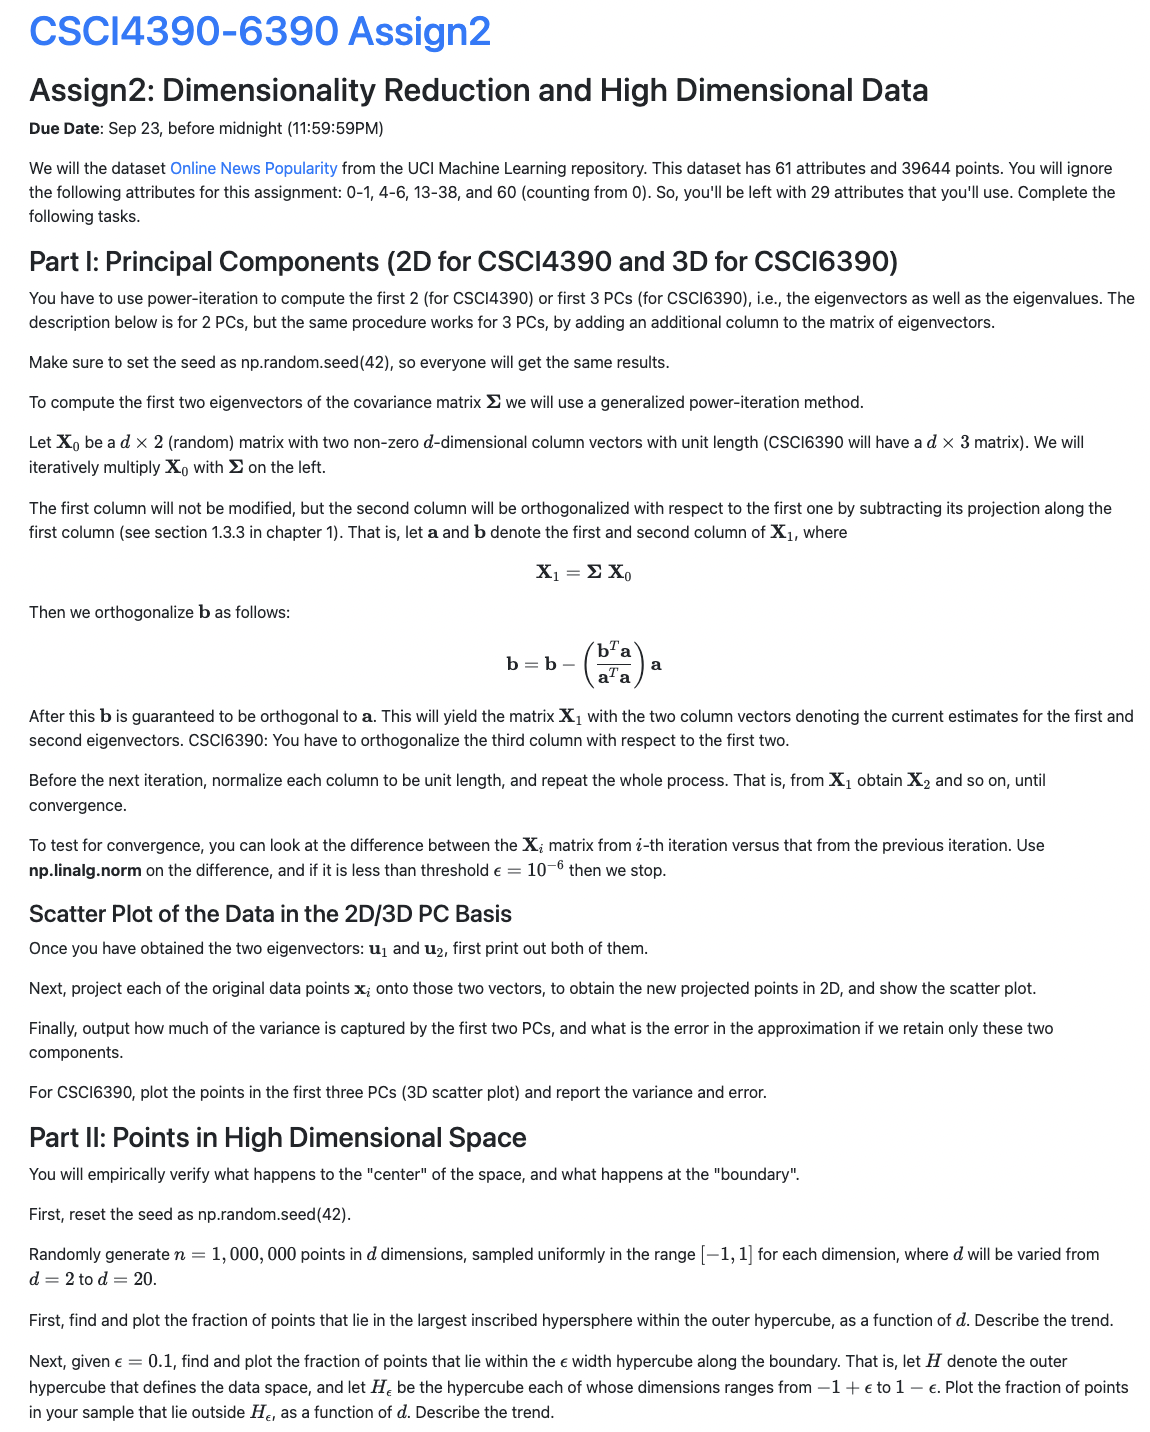

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('OnlineNewsPopularity.csv')
print(df.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [4]:
c1 = df[df.columns[2:4]]
c2 = df[df.columns[7:13]]
c3 = df[df.columns[39:60]]
df = pd.concat([c1, c2, c3], axis=1)
df.head()


,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,LDA_00,LDA_01,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,4.0,2.0,1.0,0.0,4.680365,5.0,0.500331,0.378279,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.799756,0.050047,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.217792,0.033334,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.028573,0.419300,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,19.0,19.0,20.0,0.0,4.682836,7.0,0.028633,0.028794,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [5]:
df2=np.sum(df)
print(df2.head())
df_mean = (df2/len(df)).T
print(df_mean.head())
df = df-df_mean
df

 n_tokens_title        412248.0
 n_tokens_content    21666030.0
 num_hrefs             431473.0
 num_self_hrefs        130573.0
 num_imgs              180148.0
dtype: float64
 n_tokens_title       10.398749
 n_tokens_content    546.514731
 num_hrefs            10.883690
 num_self_hrefs        3.293638
 num_imgs              4.544143
dtype: float64


,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,LDA_00,LDA_01,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.601251,-327.514731,-6.88369,-1.293638,-3.544143,-1.249874,0.132126,-2.223767,0.315732,0.237023,...,0.024811,0.004554,-0.056728,-0.090476,-0.078056,-0.092500,0.217647,-0.258925,-0.341843,0.031436
1,-1.398749,-291.514731,-7.88369,-2.293638,-3.544143,-1.249874,0.365486,-3.223767,0.615157,-0.091209,...,-0.066910,-0.062112,-0.056728,0.140774,0.396944,0.007500,-0.282353,-0.071425,0.158157,-0.156064
2,-1.398749,-335.514731,-7.88369,-2.293638,-3.544143,-1.249874,-0.154874,-1.223767,0.033193,-0.107921,...,0.142008,0.004554,0.243272,-0.207143,-0.278056,-0.025833,-0.282353,-0.071425,0.158157,-0.156064
3,-1.398749,-15.514731,-1.88369,-3.293638,-3.544143,-1.249874,-0.143343,-0.223767,-0.156026,0.278044,...,0.032140,0.040918,0.043272,-0.110173,-0.078056,-0.059166,-0.282353,-0.071425,0.158157,-0.156064
4,2.601251,525.485269,8.11631,15.706362,15.455857,-1.249874,0.134597,-0.223767,-0.155966,-0.112462,...,0.057302,-0.062112,0.243272,0.039332,0.021944,0.057500,0.172192,0.064938,-0.296388,-0.019700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.601251,-200.514731,-1.88369,3.706362,-3.544143,-0.249874,-0.025118,0.776233,-0.159561,-0.116255,...,-0.020034,0.004554,-0.006728,-0.000476,0.021944,-0.017500,-0.182353,-0.071425,0.058157,-0.156064
39640,1.601251,-218.514731,-1.88369,3.706362,-1.544143,46.750126,-0.142752,-0.223767,-0.155250,-0.112681,...,0.021000,0.040918,-0.056728,0.048413,0.121944,0.007500,0.017647,0.928575,-0.141843,0.843936
39641,-0.398749,-104.514731,13.11631,-2.293638,7.455857,-0.249874,0.528684,0.776233,-0.025595,-0.116231,...,-0.046552,0.040918,-0.256728,-0.096915,-0.278056,-0.059166,0.172192,0.064938,-0.296388,-0.019700
39642,-4.398749,135.485269,-0.88369,-2.293638,-3.544143,-1.249874,0.426834,-2.223767,-0.144595,-0.101252,...,-0.116974,-0.032946,-0.256728,0.054279,0.021944,0.095000,-0.282353,-0.071425,0.158157,-0.156064


In [6]:
cov = np.cov(df.T)

In [7]:
np.random.seed(42)
def norm(u):
    return np.sqrt(np.sum(u**2))

def unit(u):
    return u/norm(u)
    
def generate_u():
    return np.random.random_sample(33)

def orth_proj_uj(uj,ai):
    return (np.dot(uj,ai) / (norm(uj)**2)) * uj

def sub_proj(mat):
    for i in range(1,len(mat[0,:])):
        total_orth_proj=0
        for j in range(i):
            total_orth_proj += orth_proj_uj(mat[:,j],mat[:,i])
        mat[:,i] = mat[:,i] - total_orth_proj
    return(mat)

def unit_mat(mat):
    for i in range(0,len(mat[0,:])):
        mat[:,i] = unit(mat[:,i])
    return(mat)

def norm_sq(u):
    return np.sum(u**2)


Part 1 finding 3 eigen vectors and 3 eigen values

In [8]:
rd = np.random.rand(29,3)
ei_val= np.zeros(3)
x0 = np.zeros([29,3])
for i in range(0,3):
    x0[:,i] = unit(rd[:,i])
err = 10e-6
diff= 1
itr =0
'''
take dot product, then projection,find eigen values, then normalizatiion'''
while diff>err:
        itr+=1
        xn = x0.copy()
        xn1 =  np.dot(cov,xn)
        xn1 = sub_proj(xn1)
        for i in range(3):
            idx = np.argmax(xn1[:,i])
            if xn[idx,i] !=0:
               ei_val[i]= xn1[idx,i]/xn[idx,i]
            else: ei_val[i]=0
        
        xn1 = unit_mat(xn1)        
        
   
        diff = np.linalg.norm(xn1-xn)
        print('iteration:',itr,' ', 'diff',diff)
        x0 = xn1
print('=========================eigen values============================')
print(ei_val)
print('==========================eigen vectors===========================')
print(x0)

iteration: 1   diff 2.062653315094422
iteration: 2   diff 0.34369993259175835
iteration: 3   diff 0.6399344947619697
iteration: 4   diff 0.38980576779308024
iteration: 5   diff 0.11495125308768854
iteration: 6   diff 0.03177082193477612
iteration: 7   diff 0.009364851613827368
iteration: 8   diff 0.0030510073034986955
iteration: 9   diff 0.0011291786783962031
iteration: 10   diff 0.00047078832519014123
iteration: 11   diff 0.00021205930668625477
iteration: 12   diff 9.922747784033954e-05
iteration: 13   diff 4.718656831586936e-05
iteration: 14   diff 2.2583202486234964e-05
iteration: 15   diff 1.0834959403333125e-05
iteration: 16   diff 5.203319798008173e-06
=========================eigen values============================
[2.21975023e+05 1.13856971e+02 5.47106355e+01]
==========================eigen vectors===========================
[[ 8.14100194e-05 -1.34374953e-02 -3.90824209e-03]
 [ 9.99926215e-01 -1.18687240e-02  2.12815732e-03]
 [ 1.01811464e-02  9.32587910e-01  3.35500948e-01]


In [9]:
df_f = np.dot(df,x0)
df_f.shape

(39644, 3)

Plotting data with new eigen vectors

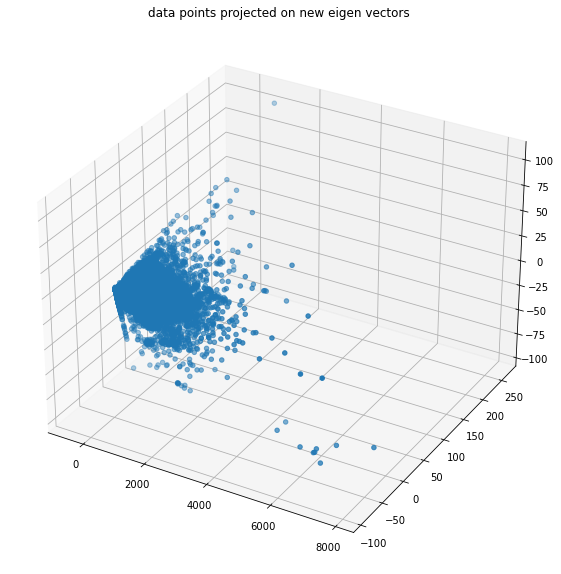

In [10]:
plt.figure(figsize=(10,10))
plt.axes(projection='3d').scatter3D(df_f[:,0],df_f[:,1],df_f[:,2])
plt.title('data points projected on new eigen vectors')
plt.show()


total variance and error

In [11]:
np.sum(df.loc[0])
v1 = np.sum(np.sum(df**2))/df.shape[0]
np.sum(df_f)
v2 = np.sum(np.sum(df_f**2))/df.shape[0]
error=((v1-v2)/v1)*100
print('original variance:',v1,'\n new variance',v2,'\n error',error)

original variance: 222175.605810902 
 new variance 222137.9870413304 
 error 0.016931998197682707


Part 2 Points inside hypersphere

In [ ]:
np.random.seed(42)
ratio=[]
n=1000
for i in range(2,21):
    new_vec=np.random.uniform(low=-1, high=1, size=(n,i))
    nv = np.sum(new_vec*new_vec, axis=1)
    tru = nv[nv <= 1 ]
    ratio.append(tru.shape[0]/n)


Text(0, 0.5, 'ratio of points in sphere')

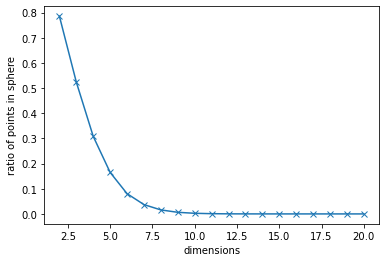

In [13]:
dims = np.arange(2, 21)
plt.plot(dims,ratio, marker='x')
plt.xlabel('dimensions')
plt.ylabel('ratio of points in sphere')


The number of points in the hypersphere decreases as the number of dimensions increase

In [14]:
np.random.seed(42)
n=1000000
e=0.1
ratio = []
for i in range(2,21):
    new_vec=np.random.uniform(low=-1, high=1, size=(1000000,i))
    for j in range(i):
        new_vec = new_vec[np.abs(new_vec[:,j]) <= 1-e ]
    ratio.append((n - new_vec.shape[0])/n)

Text(0, 0.5, 'ratio of points in hypercube')

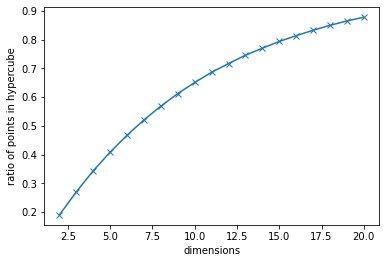

In [15]:
dims = np.arange(2, 21)
plt.plot(dims,ratio, marker='x')
plt.xlabel('dimensions')
plt.ylabel('ratio of points in hypercube')

The number of points in range -1+e to 1-e increases as we increase the number of dimensions